**What makes the two corpus different? What features are correlated with volume burst? Topic or simantic?**

Build classifiers based on topic / cluster features (3 models: evaluation, validation, ensemble)

- Target: volume burst (by month, by week, by day), Academia or Tech



# Model: Distinguishing Two Communities



In [ ]:
import numpy as np
import pandas as pd

# evaluation
from collections import Counter
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
%matplotlib inline

# validation
from sklearn import datasets
from collections import Counter

# ensemble
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
# import the data
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/DBCommunity/saved_data/whole_data.csv", index_col='Unnamed: 0')

In [ ]:
df.head(10)

,Title,Text,Author,Reply,LastReply,PublishTime,Like,Collect,Repost,Community_name,...,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,IsPeakMonth,IsPeakWeek,IsPeakDay
9,精华\n\n\n \n ...,秉承着我们小组【善用组内搜索、拒绝伸手党】的优良传统，受姐妹小组women in tech管...,Anon加重音,10,2021-04-10,2021-03-29,1,1,0,Academia,...,0.000000,0.000000,0.376726,0.000000,0.048079,0.000000,0.561267,1,0,0
11,本人研三 民族学 想申请人类学PhD 求助各位友友‼️,本人硕士就读于一所民族211，专业是少数民族经济，属于民族学，是民族学与经济学的交叉学科。硕...,momo,9,2024-01-13,2023-12-27,7,1,0,Academia,...,0.146177,0.103331,0.000000,0.000000,0.000000,0.000000,0.730828,0,0,1
19,如何对自己学术能力进行较为准确地定位和认知,各位前辈好，我是一名社科类研一硕士，近期有一些因参加年会/论坛而产生的疑惑，想向各位前辈寻求...,寡王一路硕博,17,2024-01-11,2023-12-29,3,5,6,Academia,...,0.312139,0.000000,0.000000,0.000000,0.227930,0.285675,0.120465,0,0,0
20,精华\n\n\n \n ...,哇哇哇感谢加精！！感觉本组欧美博比较多，咱就是说一年40w又离家近它不香吗555感兴趣的朋友...,Phagee,39,2024-01-11,2023-10-17,2,4,1,Academia,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.805182,0,0,0
23,精华\n\n\n \n ...,今天csc联培的结果出来啦～获得了资助，各位uu有任何问题都可以留言提问，长期有效，看到就会...,无弈,18,2024-01-10,2023-07-26,3,9,1,Academia,...,0.068154,0.000000,0.000000,0.683142,0.000000,0.000000,0.192577,1,1,0
24,phd 研究方向-gpt4后的机器学习人该怎么考虑未来研究方向的选择,本人是做机器学习交叉学科应用的菜鸡一个，平时就觉得自己的研究内容没有竞争力，cs 专业读研后...,遗忘边境,14,2024-01-10,2023-03-15,1,2,3,Academia,...,0.533512,0.000000,0.000000,0.000000,0.000000,0.000000,0.214457,1,0,0
28,读博熬过了最艰难的开头，现在一马平川😬,毕业后工作了2-3年，觉得自己不太适合在公司里干，回来读博了，希望留在学术界。因为以前没有很...,小雨点,7,2024-01-10,2022-05-12,3,0,0,Academia,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.228427,0.262713,0,1,1
30,一起翻译一本关于“服美役”的书,The Beauty Myth8.5Naomi Wolf / 2002 / Harper P...,渺,18,2024-01-09,2023-12-03,7,3,0,Academia,...,0.000000,0.000000,0.354880,0.000000,0.000000,0.623744,0.000000,0,0,0
31,有对性别与技术感兴趣的姐妹吗？,本人一直对性别，数字技术，digital media等话题很感兴趣。喜欢社会学和人类学的研究...,Yoyo,67,2024-01-09,2023-02-10,1,1,0,Academia,...,0.636423,0.000000,0.345955,0.000000,0.000000,0.000000,0.000000,0,1,1
33,一些杂七杂八的搞学术日记,2023.8.30谷歌搜到可以做研究材料的图片，但是找不到信源。现在就像欲m求不满的怨妇，带...,啾啾鸟鸣,8,2024-01-09,2023-08-22,2,0,0,Academia,...,0.000000,0.091527,0.078747,0.000000,0.000000,0.819799,0.000000,0,0,0


In [ ]:
df.columns

Index(['Title', 'Text', 'Author', 'Reply', 'LastReply', 'PublishTime', 'Like',
       'Collect', 'Repost', 'Community_name', 'seg_text', 'tokenized_text',
       'Reply_Year', 'Reply_Month', 'Reply_Day', 'Pub_Year', 'Pub_Month',
       'Pub_Day', 'normalized_text', 'tokenized_sentences', 'TopPost',
       'Length', 'Aca', 'doc_embedding', 'cluster_wordembedding', 'cluster_0',
       'cluster_1', 'cluster_2', 'cluster_3', 'cluster_4', 'Title.1', 'topics',
       'topic_0', 'topic_1', 'topic_2', 'topic_3', 'topic_4', 'topic_5',
       'topic_6', 'topic_7', 'topic_8', 'topic_9', 'IsPeakMonth', 'IsPeakWeek',
       'IsPeakDay'],
      dtype='object')

## Target, Features, and Train/Test Split

In [ ]:
# Target
df_y = df[['Aca']]

In [ ]:
# Features
df_X = df[['topic_0', 'topic_1', 'topic_2', 'topic_3', 'topic_4', 'topic_5', 'topic_6', 'topic_7', 'topic_8', 'topic_9', # topic
            'cluster_0', 'cluster_1', 'cluster_2', 'cluster_3', 'cluster_4', # cluster
            'TopPost', 'Like', 'Collect', 'Repost', 'Length']] # control

In [ ]:
df_X.shape, df_y.shape

((15004, 20), (15004, 1))

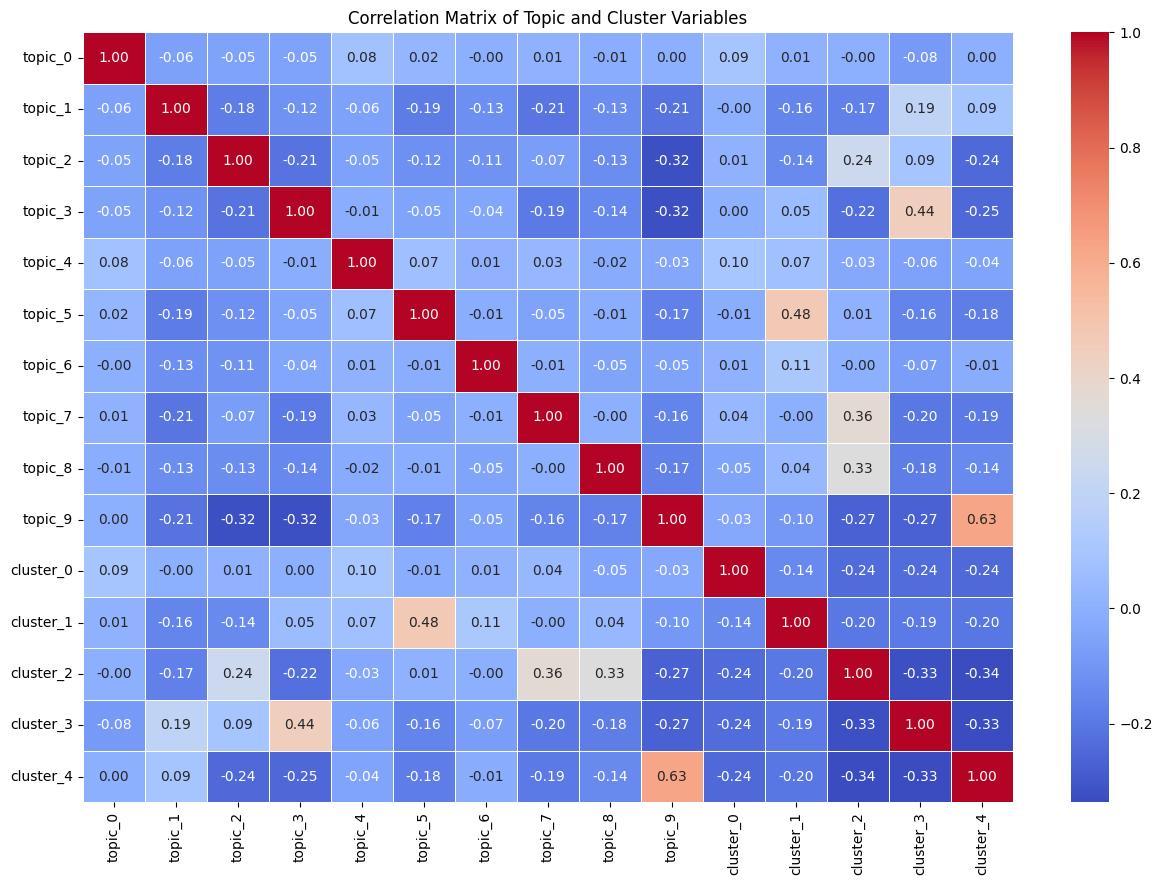

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and it contains the topic and cluster variables
# Select the 10 topic columns and 5 cluster columns
selected_columns = [f'topic_{i}' for i in range(10)] + [f'cluster_{i}' for i in range(5)]
selected_df = df[selected_columns]

# Compute the correlation matrix
correlation_matrix = selected_df.corr()

# Visualize the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Topic and Cluster Variables')
plt.show()

In [ ]:
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    df_X, df_y, test_size=0.33, random_state=42, shuffle=True) # shuffle for cross validation
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((10052, 20), (4952, 20), (10052, 1), (4952, 1))

## Train Models

### DecisionTree Classifier

In [ ]:
# Create a DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(
    criterion='entropy', random_state=42, max_depth=30)

# Use the "fit" function to train the DecisionTreeClassifier on training set
dt_clf.fit(X_train, y_train)

# Use the "score" function to evaluate the model performance on testing set and report accuracy
# Round it to the 3rd decimal (e.g., 0.800, 0.850, 0.862).
float("{:.3f}".format(dt_clf.score(X_test, y_test)))

0.798

In [ ]:
# extract feature names of best performing model
features = dt_clf.feature_names_in_
# extract feature importance
importance = np.round(dt_clf.feature_importances_, 2)

# Create pandas dataframe of feature and correpsonding importance
df_importance = pd.DataFrame([features, importance]).T
df_importance.rename(columns={0: 'feature', 1: 'importance'}, inplace=True)

# Sort descendingly based on importance
df_importance.sort_values(['importance'], ascending=False, inplace=True)

# Show dataframe
df_importance.reset_index(drop=True)

,feature,importance
0,cluster_3,0.13
1,topic_9,0.12
2,Length,0.1
3,topic_2,0.1
4,topic_1,0.1
5,topic_8,0.08
6,topic_3,0.07
7,topic_6,0.05
8,topic_7,0.05
9,topic_5,0.04


### Random Forest Classifier

In [ ]:
# Initiate the model
rf_clf = RandomForestClassifier(
    n_estimators=100, criterion='entropy', random_state=42)

# train RFC
rf_clf.fit(X_train, y_train)

# evaluate the random forest classifier on test set
float("{:.3f}".format(rf_clf.score(X_test, y_test)))

<ipython-input-16-144083b93fc8>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_clf.fit(X_train, y_train)


0.85

In [ ]:
# extract feature names of initial model
features = rf_clf.feature_names_in_
# extract feature importance
importance = np.round(rf_clf.feature_importances_, 2)

# Create pandas dataframe of features and correpsonding importance
df_importance = pd.DataFrame([features, importance]).T
df_importance.rename(columns={0: 'feature', 1: 'importance'}, inplace=True)

# Sort descendingly based on importance
df_importance.sort_values(['importance'], ascending=False, inplace=True)

# Show dataframe
df_importance.reset_index(drop=True)

,feature,importance
0,topic_9,0.12
1,topic_2,0.11
2,Length,0.1
3,topic_3,0.1
4,topic_1,0.09
5,cluster_3,0.07
6,topic_8,0.07
7,topic_7,0.06
8,topic_6,0.05
9,Collect,0.05


### Logistic Regression

In [ ]:
# Initiate the model
lr_clf = LogisticRegression(
    penalty='l2', random_state=42)

# train RFC
lr_clf.fit(X_train, y_train)

# evaluate the random forest classifier on test set
float("{:.3f}".format(lr_clf.score(X_test, y_test)))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.776

In [ ]:
# extract feature names of initial model
features = lr_clf.feature_names_in_
# extract feature importance
coef = np.round(lr_clf.coef_, 2).flatten()

# Create pandas dataframe of features and correpsonding importance
df_coef = pd.DataFrame([features, coef]).T
df_coef.rename(columns={0: 'feature', 1: 'coef'}, inplace=True)

# Sort descendingly based on importance
df_coef.sort_values(['coef'], ascending=False, inplace=True)

# Show dataframe
df_coef.reset_index(drop=True)

,feature,coef
0,topic_9,1.26
1,cluster_2,1.09
2,topic_8,0.79
3,cluster_4,0.71
4,topic_7,0.7
5,topic_6,0.36
6,topic_0,0.08
7,topic_4,0.03
8,Like,-0.0
9,Length,-0.0


It seems like that random forest performs the best based on the performance score.

## Evaluation

- confusion matrix
- precision/recall/f1
- roc_auc_score/roc_curve

In [ ]:
# Calculate the predicted value
y_dt_pred = dt_clf.predict(X_test)
y_rf_pred = rf_clf.predict(X_test)
y_lr_pred = lr_clf.predict(X_test)

Calculate the confusion matrix:

In [ ]:
confusion_matrix(y_test, y_dt_pred, labels=[1,0])

array([[ 843,  514],
       [ 485, 3110]])

In [ ]:
confusion_matrix(y_test, y_rf_pred, labels=[1,0])

array([[ 870,  487],
       [ 255, 3340]])

In [ ]:
confusion_matrix(y_test, y_lr_pred, labels=[1,0])

array([[ 614,  743],
       [ 365, 3230]])

Classification report:

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score, auc

In [ ]:
print(classification_report(y_test, y_dt_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.87      0.86      3595
         1.0       0.63      0.62      0.63      1357

    accuracy                           0.80      4952
   macro avg       0.75      0.74      0.74      4952
weighted avg       0.80      0.80      0.80      4952



In Decision Tree Model:
- Precision for the negative class (0.0) is high at 0.86, suggesting that when the model predicts the negative class, it is correct 86% of the time. However, for the positive class (1.0), the precision is lower at 0.63.
- Recall shows a similar trend, with the model correctly identifying 87% of all actual negative cases and 62% of all actual positive cases.
- F1-Score, which is a balance between precision and recall, indicates decent performance for both classes but is better for the negative class.
- Accuracy of 0.80 suggests that 80% of all predictions (both classes combined) are correct.
- Advantages: The decision tree is relatively simple to understand and interpret. It's good for capturing non-linear relationships.
- Disadvantages: Prone to overfitting, especially with complex trees, and may not generalize well to new data.

In [ ]:
print(classification_report(y_test, y_rf_pred))

              precision    recall  f1-score   support

         0.0       0.87      0.93      0.90      3595
         1.0       0.77      0.64      0.70      1357

    accuracy                           0.85      4952
   macro avg       0.82      0.79      0.80      4952
weighted avg       0.85      0.85      0.85      4952



In Random Forest Model:
- Precision and recall are improved for both classes compared to the decision tree, particularly for the negative class, indicating a better overall ability to correctly classify instances.
- F1-Score improvements are noticeable, especially for the negative class, showing a better balance between precision and recall.
- Accuracy is higher at 0.85, indicating that the model is more accurate overall compared to the decision tree and logistic regression.
- Advantages: Random forests generally perform better than decision trees due to their ensemble approach, reducing overfitting and improving generalization.
- Disadvantages: More complex, harder to interpret than decision trees, and can be computationally intensive.

In [ ]:
print(classification_report(y_test, y_lr_pred))

              precision    recall  f1-score   support

         0.0       0.81      0.90      0.85      3595
         1.0       0.63      0.45      0.53      1357

    accuracy                           0.78      4952
   macro avg       0.72      0.68      0.69      4952
weighted avg       0.76      0.78      0.76      4952



In Logistic Regression Model:
- Precision for the negative class is lower than random forest but comparable to the decision tree. For the positive class, it's on the lower side, similar to the decision tree.
- Recall for the positive class is notably lower, indicating challenges in correctly identifying positive instances.
- F1-Score for the positive class is the lowest among the three models, suggesting difficulties in balancing precision and recall for this class.
- Accuracy is close to that of the decision tree, at 0.78.
- Advantages: Logistic regression is very straightforward, easy to implement, interpret, and efficient to train. It works well for linearly separable classes.
- Disadvantages: It can struggle with complex relationships that are better captured by decision trees or random forests.

Draw the ROC-AUC curve:

In [ ]:
# Predict probabilities for the test dataset
probabilities_dt = dt_clf.predict_proba(X_test)
probabilities_rf = rf_clf.predict_proba(X_test)
probabilities_lr = lr_clf.predict_proba(X_test)

In [ ]:
# Extract the probabilities for the positive class
y_scores_dt = probabilities_dt[:, 1]
y_scores_rf = probabilities_rf[:, 1]
y_scores_lr = probabilities_lr[:, 1]

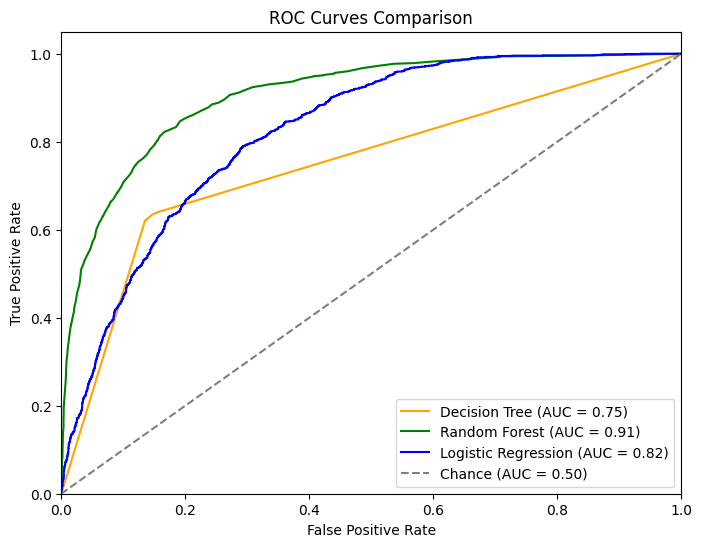

In [ ]:
# Compute ROC curve and ROC area for each model
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_scores_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_scores_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_scores_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

# Plotting the ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, color='orange',
         label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
plt.plot(fpr_rf, tpr_rf, color='green',
         label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_lr, tpr_lr, color='blue',
         label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')

plt.plot([0, 1], [0, 1], color='gray',
         linestyle='--', label='Chance (AUC = 0.50)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend(loc="lower right")
plt.show()

The ROC-AUC curves reconfirm our previous analysis -- Random Forest has the best performance (largest area under the curve). An interesting pattern is the the Decision Tree curve has a very sharp turning point, which could probably highlight the importance of a particular feature or set of features that dramatically improves model's ability to distinguish the classes.

## Validation

### GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# DT
dt = DecisionTreeClassifier(random_state=42)
dt_parameters = {'criterion': ['gini', 'entropy', 'log_loss'],
                 'max_depth': [None, 30, 20, 10],
                 'min_samples_split': [2, 3, 4]}

dt_grid_cv = GridSearchCV(estimator=dt, param_grid=dt_parameters, cv=5)

dt_grid_cv.fit(df_X, df_y)

In [ ]:
dt_grid_cv.best_params_, dt_grid_cv.best_score_

({'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 2},
 0.790519493502166)

In [ ]:
dt_best = dt_grid_cv.best_estimator_

In [ ]:
# RF
rf = RandomForestClassifier(random_state=42)
rf_parameters = {'criterion': ['gini', 'entropy', 'log_loss'],
                 'max_depth': [None, 30, 20, 10],
                 'min_samples_split': [2, 3, 4]}

rf_grid_cv = GridSearchCV(estimator=rf, param_grid=rf_parameters, cv=5)

rf_grid_cv.fit(df_X, df_y)

In [ ]:
rf_grid_cv.best_params_, rf_grid_cv.best_score_

({'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 2},
 0.8173797178718205)

In [ ]:
rf_best = rf_grid_cv.best_estimator_

In [ ]:
# LR
lr = LogisticRegression(random_state=42)
lr_parameters = {'penalty': ('l1', 'l2'),
                 'C': [0.1, 1, 10],
                 'solver': ['liblinear']}

lr_grid_cv = GridSearchCV(estimator=lr, param_grid=lr_parameters, cv=5)

lr_grid_cv.fit(df_X, df_y)

In [ ]:
lr_grid_cv.best_params_, lr_grid_cv.best_score_

({'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}, 0.7889874264134178)

In [ ]:
lr_best = lr_grid_cv.best_estimator_

Applying GridSearch CV to find the best hyperparameter for each model, we have three best models. An anomaly happens here: the best decision tree model and random forest model have lower accuracy scores compared to the previous models. The explanation could be:

GridSearchCV uses cross-validation (CV) to evaluate each set of parameters, which means the dataset is split into k folds (as specified by the cv parameter). Each fold serves as the test set once, while the remaining k-1 folds form the training set. This process helps in assessing the model's ability to generalize but might result in selecting a model with slightly lower performance on the entire dataset, aiming for better generalization instead.

## KFold

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
# apply KFold split on the dataset
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for train_idx, test_idx in kf.split(df_X):
    print("Train samples: %s \nTest samples: %s\n" % (train_idx, test_idx))

Train samples: [    0     1     2 ... 15000 15001 15003] 
Test samples: [    3     8    14 ... 14994 14997 15002]

Train samples: [    1     2     3 ... 15001 15002 15003] 
Test samples: [    0    10    17 ... 14986 14993 15000]

Train samples: [    0     1     2 ... 15000 15001 15002] 
Test samples: [   12    20    26 ... 14996 14999 15003]

Train samples: [    0     1     3 ... 15001 15002 15003] 
Test samples: [    2     6     7 ... 14992 14995 14998]

Train samples: [    0     2     3 ... 15000 15002 15003] 
Test samples: [    1     4     5 ... 14984 14987 15001]



In [ ]:
# DT
dt_cv_scores = cross_val_score(dt_best, df_X, df_y, cv=kf, scoring='accuracy')
dt_cv_scores

array([0.79740087, 0.80973009, 0.81406198, 0.81006331, 0.80433333])

In [ ]:
# RF
rf_cv_scores = cross_val_score(rf_best, df_X, df_y, cv=kf, scoring='accuracy')
rf_cv_scores

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

array([0.81939354, 0.8413862 , 0.82372542, 0.83605465, 0.82933333])

In [ ]:
# LR
lr_cv_scores = cross_val_score(lr_best, df_X, df_y, cv=kf, scoring='accuracy')
lr_cv_scores

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

array([0.7934022 , 0.79140287, 0.79006998, 0.79873376, 0.792     ])

Based on the cross-validation result shown above, we can see all models show some variability in their accuracy scores across different folds, which is expected in cross-validation due to the changing training and test sets. However, this variability is relatively contained, suggesting that all models are reasonably stable across different subsets of the data.

The Random Forest classifiers have the highest accuracy scores. Decision Tree classifiers and Logistic Regression fail to achieve the accuracy scores of the Random Forest model, indicating they might not be as effective for this specific dataset in terms of identifying posts in different communities.

## Ensemble

In [ ]:
base_estimators = [('Decision Tree Classifier', dt_best),
                   ('Random Forest Classifier', rf_best),
                   ('Logistic Regression', lr_best)]

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import GradientBoostingClassifier

# stacking the multiple individual estomators and the final estimator
stack_clf = StackingClassifier(
    estimators=base_estimators)

# fit the stacked classifier
stack_clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


StackingClassifier(estimators=[('Decision Tree Classifier',
                                DecisionTreeClassifier(max_depth=10,
                                                       random_state=42)),
                               ('Random Forest Classifier',
                                RandomForestClassifier(criterion='entropy',
                                                       max_depth=10,
                                                       random_state=42)),
                               ('Logistic Regression',
                                LogisticRegression(C=1, penalty='l1',
                                                   random_state=42,
                                                   solver='liblinear'))])

In [ ]:
stack_clf.score(X_test, y_test)

0.8279483037156704

Among the three best models selected by GridSearchCV, Random Forest Classifier attains the highest accuracy score of 0.817. After applying emsemble learning method, the accuracy score is increased to 0.827.

Furthermore, we want to inspect which feature is the most important in distinguishing the two datasets. Moreover, we are also curious about whether topic or semantic is more important in differentiating them. Now we inspect the best random forest model.

In [ ]:
# extract feature names of initial model
features = rf_best.feature_names_in_
# extract feature importance
importance = np.round(rf_best.feature_importances_, 2)

# Create pandas dataframe of features and correpsonding importance
df_importance = pd.DataFrame([features, importance]).T
df_importance.rename(columns={0: 'feature', 1: 'importance'}, inplace=True)

# Sort descendingly based on importance
df_importance.sort_values(['importance'], ascending=False, inplace=True)

# Show dataframe
df_importance.reset_index(drop=True)

,feature,importance
0,cluster_3,0.16
1,topic_9,0.13
2,topic_2,0.11
3,topic_3,0.11
4,topic_8,0.08
5,topic_1,0.08
6,topic_6,0.06
7,topic_7,0.06
8,Length,0.04
9,topic_5,0.03


In [ ]:
# calculate the summarized importance of clusters and topics
data = {
    'feature': ['cluster_3', 'topic_9', 'topic_2', 'topic_3', 'topic_8', 'topic_1', 'topic_6',
                'topic_7', 'Length', 'topic_5', 'Collect', 'Like', 'cluster_4', 'topic_0',
                'cluster_2', 'cluster_1', 'topic_4', 'Repost', 'TopPost', 'cluster_0'],
    'importance': [0.16, 0.13, 0.11, 0.11, 0.08, 0.08, 0.06, 0.06, 0.04, 0.03, 0.02, 0.02,
                   0.02, 0.02, 0.02, 0.01, 0.01, 0.01, 0.0, 0.0]
}

# Create DataFrame
df_importance = pd.DataFrame(data)

# Calculate sum of importance for clusters and topics separately
sum_importance_clusters = df_importance[df_importance['feature'].str.contains('cluster_')]['importance'].sum()
sum_importance_topics = df_importance[df_importance['feature'].str.contains('topic_')]['importance'].sum()

sum_importance_clusters, sum_importance_topics

(0.21, 0.6900000000000001)

Cluster_3 has the highest importance score, which suggests it has the most significant impact on the model's predictions.

However, by summing the scores of clusters and topics, the 10 topics contribute 69% to the explanatory power of the model.

To sum up, topics to discuss are predominant in distinguishing the two communities, though semantic information is also divergent between them.

In [ ]:
# Predict probabilities for the test dataset
probabilities_dt = dt_best.predict_proba(X_test)
probabilities_rf = rf_best.predict_proba(X_test)
probabilities_lr = lr_best.predict_proba(X_test)
probabilities_stack = stack_clf.predict_proba(X_test)

In [ ]:
# Extract the probabilities for the positive class
y_scores_dt = probabilities_dt[:, 1]
y_scores_rf = probabilities_rf[:, 1]
y_scores_lr = probabilities_lr[:, 1]
y_scores_stack = probabilities_stack[:, 1]

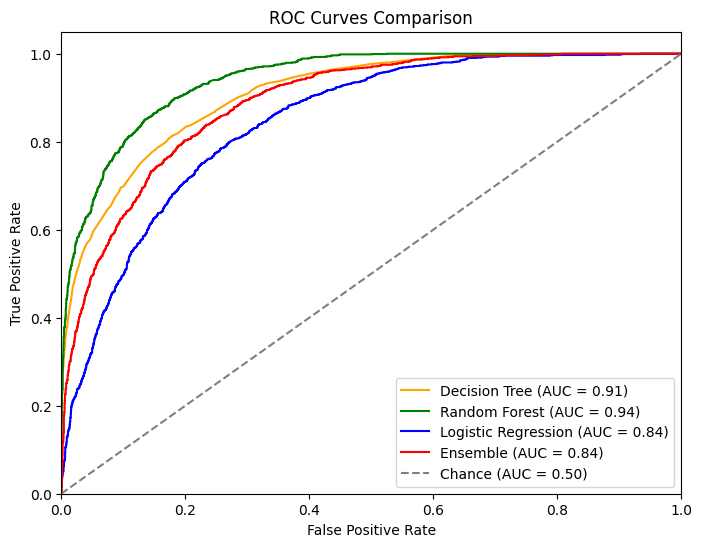

In [ ]:
# Compute ROC curve and ROC area for each model
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_scores_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_scores_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_scores_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

fpr_stack, tpr_stack, _ = roc_curve(y_test, y_scores_stack)
roc_auc_stack = auc(fpr_stack, tpr_stack)

# Plotting the ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, color='orange',
         label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
plt.plot(fpr_rf, tpr_rf, color='green',
         label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_lr, tpr_lr, color='blue',
         label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.plot(fpr_stack, tpr_stack, color='red',
         label=f'Ensemble (AUC = {roc_auc_lr:.2f})')

plt.plot([0, 1], [0, 1], color='gray',
         linestyle='--', label='Chance (AUC = 0.50)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend(loc="lower right")
plt.show()

## KFold

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
# apply KFold split on the dataset
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for train_idx, test_idx in kf.split(df_X):
    print("Train samples: %s \nTest samples: %s\n" % (train_idx, test_idx))

Train samples: [    0     1     2 ... 15000 15001 15003] 
Test samples: [    3     8    14 ... 14994 14997 15002]

Train samples: [    1     2     3 ... 15001 15002 15003] 
Test samples: [    0    10    17 ... 14986 14993 15000]

Train samples: [    0     1     2 ... 15000 15001 15002] 
Test samples: [   12    20    26 ... 14996 14999 15003]

Train samples: [    0     1     3 ... 15001 15002 15003] 
Test samples: [    2     6     7 ... 14992 14995 14998]

Train samples: [    0     2     3 ... 15000 15002 15003] 
Test samples: [    1     4     5 ... 14984 14987 15001]



In [ ]:
# RF
rf_cv_scores = cross_val_score(rf_best, df_X, df_y, cv=kf, scoring='accuracy')
rf_cv_scores

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

array([0.81939354, 0.8413862 , 0.82372542, 0.83605465, 0.82933333])

In [ ]:
# Ensemble
stack_cv_scores = cross_val_score(stack_clf, df_X, df_y, cv=kf, scoring='accuracy')
stack_cv_scores

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the 

array([0.81572809, 0.83672109, 0.82439187, 0.84305232, 0.829     ])

## Error Analysis

In [ ]:
len(test_idx)

3000

In [ ]:
len(y_test)

4952

In [47]:
rf_test = pd.concat([X_test,y_test],axis=1)
rf_test['pred_label'] = rf_best.predict(X_test)
rf_test

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,...,cluster_2,cluster_3,cluster_4,TopPost,Like,Collect,Repost,Length,Aca,pred_label
3784,0.000000,0.200428,0.232404,0.000000,0.000000,0.000000,0.000000,0.000000,0.112534,0.451578,...,0.0,0.0,1.0,False,2,7,0,376,1.0,1.0
942,0.000000,0.000000,0.015094,0.010168,0.000000,0.091144,0.000000,0.000000,0.852535,0.000000,...,0.0,0.0,1.0,False,3,0,0,57,1.0,1.0
7648,0.132042,0.000000,0.027237,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.836826,...,0.0,0.0,1.0,False,1,0,0,435,0.0,0.0
6988,0.000000,0.339046,0.137797,0.411084,0.000000,0.000000,0.000000,0.000000,0.000000,0.104152,...,0.0,1.0,0.0,False,1,1,0,123,0.0,0.0
1559,0.000000,0.209677,0.245335,0.000000,0.000000,0.000000,0.000000,0.000000,0.129988,0.413026,...,0.0,0.0,1.0,False,1,4,0,710,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7492,0.021897,0.133822,0.091389,0.196192,0.000000,0.000000,0.000000,0.000000,0.060630,0.495267,...,0.0,0.0,1.0,False,6,3,1,818,0.0,0.0
5974,0.000000,0.000000,0.623175,0.000000,0.000000,0.242479,0.038679,0.000000,0.000000,0.081888,...,1.0,0.0,0.0,False,2,6,3,126,0.0,0.0
1740,0.000000,0.000000,0.000000,0.236221,0.034529,0.235721,0.000000,0.000000,0.477405,0.000000,...,0.0,0.0,0.0,False,1,1,1,123,1.0,0.0
13930,0.057116,0.000000,0.206811,0.422241,0.000000,0.284117,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,False,1,1,7,45,0.0,0.0


In [58]:
errors = rf_test[rf_test['Aca'] != rf_test['pred_label']]
correct = rf_test[rf_test['Aca'] == rf_test['pred_label']]

In [59]:
errors['Length'].mean(), correct['Length'].mean()

(183.86697247706422, 269.08585388552814)

In [61]:
errors.describe()

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,...,cluster_1,cluster_2,cluster_3,cluster_4,Like,Collect,Repost,Length,Aca,pred_label
count,654.000000,654.000000,654.000000,654.000000,654.000000,654.000000,654.000000,654.000000,654.000000,654.000000,...,654.000000,654.000000,654.000000,654.000000,654.000000,654.000000,654.000000,654.000000,654.000000,654.000000
mean,0.005852,0.117507,0.187211,0.083546,0.004314,0.069021,0.011694,0.069637,0.073617,0.361374,...,0.123853,0.262997,0.013761,0.405199,1.692661,2.088685,0.538226,183.866972,0.793578,0.206422
std,0.027257,0.201343,0.237769,0.178820,0.025163,0.165880,0.048943,0.155896,0.165212,0.338484,...,0.329666,0.440598,0.116588,0.491306,2.103459,2.470920,1.241538,344.261825,0.405047,0.405047
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.011178,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011562,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,41.250000,1.000000,0.000000
50%,0.000000,0.012274,0.083808,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.287737,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,95.500000,1.000000,0.000000
75%,0.000000,0.141502,0.293784,0.064249,0.000000,0.035592,0.000000,0.048441,0.041145,0.675317,...,0.000000,1.000000,0.000000,1.000000,3.000000,3.000000,1.000000,203.750000,1.000000,0.000000
max,0.389942,0.982580,0.978397,0.983489,0.470992,0.973427,0.730700,0.950586,0.928596,0.979656,...,1.000000,1.000000,1.000000,1.000000,9.000000,9.000000,9.000000,5314.000000,1.000000,1.000000


In [62]:
correct.describe()

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,...,cluster_1,cluster_2,cluster_3,cluster_4,Like,Collect,Repost,Length,Aca,pred_label
count,4298.000000,4298.000000,4298.000000,4298.000000,4298.000000,4298.000000,4298.000000,4298.000000,4298.000000,4298.000000,...,4298.000000,4298.000000,4298.000000,4298.000000,4298.000000,4298.000000,4298.000000,4298.000000,4298.000000,4298.000000
mean,0.004906,0.171516,0.212575,0.171496,0.003462,0.056020,0.027403,0.067749,0.066944,0.204731,...,0.102141,0.239181,0.273616,0.245230,1.990693,2.416007,0.862262,269.085854,0.194974,0.194974
std,0.029223,0.231617,0.244972,0.237762,0.024862,0.134149,0.090629,0.148578,0.152925,0.271651,...,0.302868,0.426633,0.445866,0.430274,2.353238,2.480090,1.733089,463.850917,0.396227,0.396227
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.012113,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,64.000000,0.000000,0.000000
50%,0.000000,0.044040,0.120565,0.052226,0.000000,0.000000,0.000000,0.000000,0.000000,0.056610,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,144.000000,0.000000,0.000000
75%,0.000000,0.291517,0.347135,0.266481,0.000000,0.035578,0.000000,0.051279,0.042843,0.353600,...,0.000000,0.000000,1.000000,0.000000,3.000000,4.000000,1.000000,286.000000,0.000000,0.000000
max,0.867110,0.989128,0.991260,0.993933,0.577342,0.956225,0.968598,0.985946,0.987500,0.990732,...,1.000000,1.000000,1.000000,1.000000,9.000000,9.000000,9.000000,6345.000000,1.000000,1.000000


# Model: What contributes to volume burst

In [ ]:
topic_by_day = pd.read_csv("/content/drive/MyDrive/DBCommunity/saved_data/topic_by_day.csv", index_col="Unnamed: 0")
cluster_by_day = pd.read_csv("/content/drive/MyDrive/DBCommunity/saved_data/cluster_by_day.csv", index_col="Unnamed: 0")

In [ ]:
topic_by_day

,PublishTime,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9
0,2021-01-01,0.000000,31.614122,49.973456,11.761876,0.000000,5.178785,2.516977,6.371837,2.217153,19.960408
1,2021-01-02,19.899620,22.898778,30.911536,0.634922,0.000000,92.005617,3.324571,7.882761,19.706019,8.193239
2,2021-01-03,0.337745,22.564844,21.102358,20.902081,3.132613,5.601607,3.193981,2.107788,10.496170,70.304866
3,2021-01-04,0.456838,21.790906,22.459076,10.609218,0.133505,20.469296,0.002332,11.344731,16.799483,44.694796
4,2021-01-05,0.312343,24.173596,62.885616,33.692985,0.224725,15.360204,22.824857,17.505500,22.711147,71.161519
...,...,...,...,...,...,...,...,...,...,...,...
1089,2023-12-27,0.000000,74.273680,90.808634,15.428192,2.135504,0.633641,5.759176,5.900814,52.164445,45.187680
1090,2023-12-28,0.000000,17.210247,22.224158,33.417385,1.038066,7.742236,12.999808,26.155733,3.195077,19.599948
1091,2023-12-29,0.000000,57.283018,7.006856,116.050640,0.000000,0.030249,0.025023,20.210016,25.314142,101.518531
1092,2023-12-30,0.000000,64.870177,14.661546,33.416107,0.000000,2.789892,0.000000,8.927196,0.000000,15.972815


In [ ]:
cluster_by_day

,PublishTime,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4
0,2021-01-01,11.000000,20.333333,0.000000,75.555556,24.222222
1,2021-01-02,10.888889,4.888889,186.666667,4.333333,0.000000
2,2021-01-03,0.736842,7.263158,23.315789,4.789474,125.105263
3,2021-01-04,7.913043,39.260870,38.130435,13.782609,51.086957
4,2021-01-05,1.863636,26.181818,165.363636,51.954545,27.090909
...,...,...,...,...,...,...
1089,2023-12-27,5.777778,0.000000,28.222222,127.222222,132.444444
1090,2023-12-28,20.333333,34.333333,39.666667,28.166667,22.833333
1091,2023-12-29,2.000000,0.000000,88.500000,0.000000,238.166667
1092,2023-12-30,0.000000,0.000000,9.600000,29.200000,103.000000


In [ ]:
peak_months = pd.read_csv("/content/drive/MyDrive/DBCommunity/saved_data/peak_months.csv")
peak_weeks = pd.read_csv("/content/drive/MyDrive/DBCommunity/saved_data/peak_weeks.csv")
peak_days = pd.read_csv("/content/drive/MyDrive/DBCommunity/saved_data/peak_days.csv")

In [ ]:
# Drop the 'PublishTime' column from the second DataFrame before concatenation
cluster_by_day = cluster_by_day.drop('PublishTime', axis=1)

# Now concatenate without duplicates
df = pd.concat([topic_by_day, cluster_by_day], axis=1)

In [ ]:
df

,PublishTime,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4
0,2021-01-01,0.000000,31.614122,49.973456,11.761876,0.000000,5.178785,2.516977,6.371837,2.217153,19.960408,11.000000,20.333333,0.000000,75.555556,24.222222
1,2021-01-02,19.899620,22.898778,30.911536,0.634922,0.000000,92.005617,3.324571,7.882761,19.706019,8.193239,10.888889,4.888889,186.666667,4.333333,0.000000
2,2021-01-03,0.337745,22.564844,21.102358,20.902081,3.132613,5.601607,3.193981,2.107788,10.496170,70.304866,0.736842,7.263158,23.315789,4.789474,125.105263
3,2021-01-04,0.456838,21.790906,22.459076,10.609218,0.133505,20.469296,0.002332,11.344731,16.799483,44.694796,7.913043,39.260870,38.130435,13.782609,51.086957
4,2021-01-05,0.312343,24.173596,62.885616,33.692985,0.224725,15.360204,22.824857,17.505500,22.711147,71.161519,1.863636,26.181818,165.363636,51.954545,27.090909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1089,2023-12-27,0.000000,74.273680,90.808634,15.428192,2.135504,0.633641,5.759176,5.900814,52.164445,45.187680,5.777778,0.000000,28.222222,127.222222,132.444444
1090,2023-12-28,0.000000,17.210247,22.224158,33.417385,1.038066,7.742236,12.999808,26.155733,3.195077,19.599948,20.333333,34.333333,39.666667,28.166667,22.833333
1091,2023-12-29,0.000000,57.283018,7.006856,116.050640,0.000000,0.030249,0.025023,20.210016,25.314142,101.518531,2.000000,0.000000,88.500000,0.000000,238.166667
1092,2023-12-30,0.000000,64.870177,14.661546,33.416107,0.000000,2.789892,0.000000,8.927196,0.000000,15.972815,0.000000,0.000000,9.600000,29.200000,103.000000


In [ ]:
peak_days

,PublishTime,0
0,2021-01-04,23
1,2021-01-08,24
2,2021-01-14,35
3,2021-01-19,21
4,2021-01-21,23
...,...,...
307,2023-12-14,12
308,2023-12-18,10
309,2023-12-21,11
310,2023-12-23,10


In [ ]:
import re

# Initialize an empty list to store extracted datetime strings
extracted_datetimes = []

# Regex pattern to match YYYY-MM-DD at the start of a string
pattern = re.compile(r"\['(\d{4}-\d{2}-\d{2})")

# Attempt to iterate over peak_months and extract datetime strings
for item in peak_months:
    # Assuming each item is a string representation
    match = pattern.search(str(item))
    if match:
        # If a match is found, add the extracted date to the list
        extracted_datetimes.append(match.group(1))

# Convert the list of extracted datetime strings to a DatetimeIndex
valid_peak_months_index = pd.to_datetime(extracted_datetimes)

print(valid_peak_months_index)

DatetimeIndex(['2021-03-31', '2021-11-30', '2022-03-31', '2022-08-31',
               '2023-03-31', '2023-07-31'],
              dtype='datetime64[ns]', freq=None)


In [ ]:
# First, ensure that 'PublishTime' is in datetime format
peak_weeks['PublishTime'] = pd.to_datetime(peak_weeks['PublishTime'])

# Convert the 'PublishTime' column to a DatetimeIndex
peak_weeks_index = pd.DatetimeIndex(peak_weeks['PublishTime'])

# Now, peak_weeks_index is a DatetimeIndex of the 'PublishTime' column
print(peak_weeks_index)

DatetimeIndex(['2021-01-17', '2021-02-21', '2021-03-14', '2021-04-18',
               '2021-05-02', '2021-05-30', '2021-06-13', '2021-06-27',
               '2021-07-11', '2021-07-25', '2021-08-15', '2021-08-29',
               '2021-09-19', '2021-10-03', '2021-10-31', '2021-11-14',
               '2021-12-26', '2022-01-16', '2022-01-30', '2022-02-27',
               '2022-03-20', '2022-04-03', '2022-04-24', '2022-05-15',
               '2022-06-05', '2022-07-10', '2022-08-14', '2022-09-04',
               '2022-10-02', '2022-10-16', '2022-11-13', '2022-12-11',
               '2023-01-15', '2023-02-12', '2023-02-26', '2023-03-12',
               '2023-03-26', '2023-04-23', '2023-05-14', '2023-06-04',
               '2023-07-09', '2023-07-30', '2023-08-20', '2023-09-03',
               '2023-09-24', '2023-10-15', '2023-10-29', '2023-11-19',
               '2023-12-10'],
              dtype='datetime64[ns]', name='PublishTime', freq=None)


In [ ]:
# First, ensure that 'PublishTime' is in datetime format
peak_days['PublishTime'] = pd.to_datetime(peak_days['PublishTime'])

# Convert the 'PublishTime' column to a DatetimeIndex
peak_days_index = pd.DatetimeIndex(peak_days['PublishTime'])

# Now, peak_days_index is a DatetimeIndex of the 'PublishTime' column
print(peak_days_index)

DatetimeIndex(['2021-01-04', '2021-01-08', '2021-01-14', '2021-01-19',
               '2021-01-21', '2021-01-23', '2021-01-26', '2021-01-28',
               '2021-01-30', '2021-02-02',
               ...
               '2023-11-25', '2023-11-28', '2023-12-01', '2023-12-04',
               '2023-12-07', '2023-12-14', '2023-12-18', '2023-12-21',
               '2023-12-23', '2023-12-27'],
              dtype='datetime64[ns]', name='PublishTime', length=312, freq=None)


In [ ]:
df['IsPeakMonth'] = df['PublishTime'].dt.to_period('M').isin(valid_peak_months_index.to_period('M')).astype(int)

df['IsPeakMonth'].describe()

count    1094.000000
mean        0.169104
std         0.375015
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: IsPeakMonth, dtype: float64

In [ ]:
df['IsPeakWeek'] = df['PublishTime'].dt.to_period('W').isin(peak_weeks_index.to_period('W')).astype(int)
df['IsPeakWeek'].describe()

count    1094.000000
mean        0.313528
std         0.464139
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: IsPeakWeek, dtype: float64

In [ ]:
df['IsPeakDay'] = df['PublishTime'].dt.to_period('D').isin(peak_days_index.to_period('D')).astype(int)
df['IsPeakDay'].describe()

count    1094.000000
mean        0.285192
std         0.451712
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: IsPeakDay, dtype: float64

In [ ]:
df.head()

,PublishTime,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4,IsPeakMonth,IsPeakWeek,IsPeakDay
0,2021-01-01,0.000000,31.614122,49.973456,11.761876,0.000000,5.178785,2.516977,6.371837,2.217153,19.960408,11.000000,20.333333,0.000000,75.555556,24.222222,0,0,0
1,2021-01-02,19.899620,22.898778,30.911536,0.634922,0.000000,92.005617,3.324571,7.882761,19.706019,8.193239,10.888889,4.888889,186.666667,4.333333,0.000000,0,0,0
2,2021-01-03,0.337745,22.564844,21.102358,20.902081,3.132613,5.601607,3.193981,2.107788,10.496170,70.304866,0.736842,7.263158,23.315789,4.789474,125.105263,0,0,0
3,2021-01-04,0.456838,21.790906,22.459076,10.609218,0.133505,20.469296,0.002332,11.344731,16.799483,44.694796,7.913043,39.260870,38.130435,13.782609,51.086957,0,0,1
4,2021-01-05,0.312343,24.173596,62.885616,33.692985,0.224725,15.360204,22.824857,17.505500,22.711147,71.161519,1.863636,26.181818,165.363636,51.954545,27.090909,0,0,0


## Target, Features, and Train/Test Split

In [ ]:
# Target
df_y_month = df[['IsPeakMonth']]
df_y_week = df[['IsPeakWeek']] # try week
df_y_day = df[['IsPeakDay']]

In [ ]:
df.columns

Index(['PublishTime', 'topic_0', 'topic_1', 'topic_2', 'topic_3', 'topic_4',
       'topic_5', 'topic_6', 'topic_7', 'topic_8', 'topic_9', 'cluster_0',
       'cluster_1', 'cluster_2', 'cluster_3', 'cluster_4', 'IsPeakMonth',
       'IsPeakWeek', 'IsPeakDay'],
      dtype='object')

In [ ]:
df_X = df[['topic_0', 'topic_1', 'topic_2', 'topic_3', 'topic_4', 'topic_5', 'topic_6', 'topic_7', 'topic_8', 'topic_9', 'cluster_0', 'cluster_1', 'cluster_2', 'cluster_3', 'cluster_4',]]


In [ ]:
df_X.shape, df_y_week.shape

((1094, 15), (1094, 1))

In [ ]:
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    df_X, df_y_week, test_size=0.33, random_state=42, shuffle=True) # shuffle for cross validation
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((732, 15), (362, 15), (732, 1), (362, 1))

## Models

### By Week


In [ ]:
# DT
dt = DecisionTreeClassifier(random_state=42)
dt_parameters = {'criterion': ['gini', 'entropy', 'log_loss'],
                 'max_depth': [None, 30, 20, 10],
                 'min_samples_split': [2, 3, 4]}

dt_grid_cv = GridSearchCV(estimator=dt, param_grid=dt_parameters, cv=5)

dt_grid_cv.fit(df_X, df_y_week)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 30, 20, 10],
                         'min_samples_split': [2, 3, 4]})

In [ ]:
dt_grid_cv.best_params_, dt_grid_cv.best_score_

({'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 3},
 0.6042310753634117)

In [ ]:
dt_best = dt_grid_cv.best_estimator_

In [ ]:
# extract feature names of best performing model
features = dt_best.feature_names_in_
# extract feature importance
importance = np.round(dt_best.feature_importances_, 2)

# Create pandas dataframe of feature and correpsonding importance
df_importance = pd.DataFrame([features, importance]).T
df_importance.rename(columns={0: 'feature', 1: 'importance'}, inplace=True)

# Sort descendingly based on importance
df_importance.sort_values(['importance'], ascending=False, inplace=True)

# Show dataframe
df_importance.reset_index(drop=True)

,feature,importance
0,topic_1,0.1
1,topic_3,0.09
2,topic_7,0.09
3,cluster_4,0.09
4,cluster_1,0.08
5,topic_0,0.07
6,topic_6,0.07
7,topic_8,0.07
8,topic_9,0.07
9,topic_4,0.06


In [ ]:
# RF
rf = RandomForestClassifier(random_state=42)
rf_parameters = {'criterion': ['gini', 'entropy', 'log_loss'],
                 'max_depth': [None, 30, 20, 10],
                 'min_samples_split': [2, 3, 4]}

rf_grid_cv = GridSearchCV(estimator=rf, param_grid=rf_parameters, cv=5)

rf_grid_cv.fit(df_X, df_y_week)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 30, 20, 10],
                         'min_samples_split': [2, 3, 4]})

In [ ]:
rf_grid_cv.best_params_, rf_grid_cv.best_score_

({'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 3},
 0.6855556951950064)

In [ ]:
rf_best = rf_grid_cv.best_estimator_

In [ ]:
# LR
lr = LogisticRegression(random_state=42)
lr_parameters = {'penalty': ('l1', 'l2'),
                 'C': [0.1, 1, 10],
                 'solver': ['liblinear']}

lr_grid_cv = GridSearchCV(estimator=lr, param_grid=lr_parameters, cv=5)

lr_grid_cv.fit(df_X, df_y_week)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.1, 1, 10], 'penalty': ('l1', 'l2'),
                         'solver': ['liblinear']})

In [ ]:
lr_grid_cv.best_params_, lr_grid_cv.best_score_

({'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}, 0.6855640735620627)

In [ ]:
lr_best_week = lr_grid_cv.best_estimator_

Logistic regression performs the best. (By week)

In [ ]:
# DT
dt = DecisionTreeClassifier(random_state=42)
dt_parameters = {'criterion': ['gini', 'entropy', 'log_loss'],
                 'max_depth': [None, 30, 20, 10],
                 'min_samples_split': [2, 3, 4]}

dt_grid_cv = GridSearchCV(estimator=dt, param_grid=dt_parameters, cv=5)

dt_grid_cv.fit(df_X, df_y_day)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 30, 20, 10],
                         'min_samples_split': [2, 3, 4]})

In [ ]:
dt_grid_cv.best_params_, dt_grid_cv.best_score_

({'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 4},
 0.6471869632608606)

In [ ]:
dt_best = dt_grid_cv.best_estimator_

In [ ]:
# RF
rf = RandomForestClassifier(random_state=42)
rf_parameters = {'criterion': ['gini', 'entropy', 'log_loss'],
                 'max_depth': [None, 30, 20, 10],
                 'min_samples_split': [2, 3, 4]}

rf_grid_cv = GridSearchCV(estimator=rf, param_grid=rf_parameters, cv=5)

rf_grid_cv.fit(df_X, df_y_day)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 30, 20, 10],
                         'min_samples_split': [2, 3, 4]})

In [ ]:
rf_grid_cv.best_params_, rf_grid_cv.best_score_

({'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 3},
 0.7111516065518829)

In [ ]:
rf_best = rf_grid_cv.best_estimator_

In [ ]:
# LR
lr = LogisticRegression(random_state=42)
lr_parameters = {'penalty': ('l1', 'l2'),
                 'C': [0.1, 1, 10],
                 'solver': ['liblinear']}

lr_grid_cv = GridSearchCV(estimator=lr, param_grid=lr_parameters, cv=5)

lr_grid_cv.fit(df_X, df_y_day)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.1, 1, 10], 'penalty': ('l1', 'l2'),
                         'solver': ['liblinear']})

In [ ]:
lr_grid_cv.best_params_, lr_grid_cv.best_score_

({'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}, 0.7138955217628085)

In [ ]:
lr_best_day = lr_grid_cv.best_estimator_

Logistic regression is the best again. (By day)

### By Month

In [ ]:
# DT
dt = DecisionTreeClassifier(random_state=42)
dt_parameters = {'criterion': ['gini', 'entropy', 'log_loss'],
                 'max_depth': [None, 30, 20, 10],
                 'min_samples_split': [2, 3, 4]}

dt_grid_cv = GridSearchCV(estimator=dt, param_grid=dt_parameters, cv=5)

dt_grid_cv.fit(df_X, df_y_month)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 30, 20, 10],
                         'min_samples_split': [2, 3, 4]})

In [ ]:
dt_grid_cv.best_params_, dt_grid_cv.best_score_

({'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 4},
 0.7760462485861506)

In [ ]:
dt_best = dt_grid_cv.best_estimator_

In [ ]:
# RF
rf = RandomForestClassifier(random_state=42)
rf_parameters = {'criterion': ['gini', 'entropy', 'log_loss'],
                 'max_depth': [None, 30, 20, 10],
                 'min_samples_split': [2, 3, 4]}

rf_grid_cv = GridSearchCV(estimator=rf, param_grid=rf_parameters, cv=5)

rf_grid_cv.fit(df_X, df_y_month)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 30, 20, 10],
                         'min_samples_split': [2, 3, 4]})

In [ ]:
rf_grid_cv.best_params_, rf_grid_cv.best_score_

({'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 2},
 0.8308952285199614)

In [ ]:
rf_best = rf_grid_cv.best_estimator_

In [ ]:
# LR
lr = LogisticRegression(random_state=42)
lr_parameters = {'penalty': ('l1', 'l2'),
                 'C': [0.1, 1, 10],
                 'solver': ['liblinear']}

lr_grid_cv = GridSearchCV(estimator=lr, param_grid=lr_parameters, cv=5)

lr_grid_cv.fit(df_X, df_y_day)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.1, 1, 10], 'penalty': ('l1', 'l2'),
                         'solver': ['liblinear']})

In [ ]:
lr_grid_cv.best_params_, lr_grid_cv.best_score_

({'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}, 0.7138955217628085)

In [ ]:
lr_best = lr_grid_cv.best_estimator_

In [ ]:
# Predict probabilities for the test dataset
probabilities_week = lr_best_week.predict_proba(X_test)
probabilities_day = lr_best_day.predict_proba(X_test)
probabilities_month = rf_best.predict_proba(X_test)

In [ ]:
# Extract the probabilities for the positive class
y_scores_week = probabilities_week[:, 1]
y_scores_day = probabilities_day[:, 1]
y_scores_month = probabilities_month[:, 1]

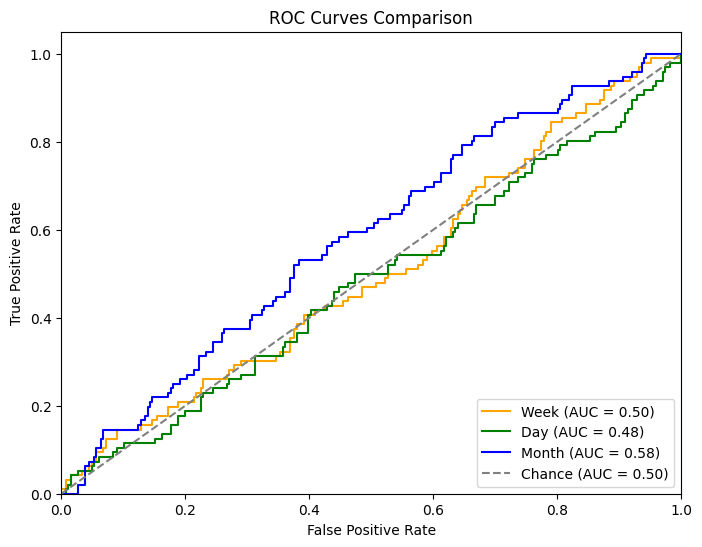

In [ ]:


# Compute ROC curve and ROC area for each model
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_scores_week)
roc_auc_dt = auc(fpr_dt, tpr_dt)

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_scores_day)
roc_auc_rf = auc(fpr_rf, tpr_rf)

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_scores_month)
roc_auc_lr = auc(fpr_lr, tpr_lr)

# Plotting the ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, color='orange',
         label=f'Week (AUC = {roc_auc_dt:.2f})')
plt.plot(fpr_rf, tpr_rf, color='green',
         label=f'Day (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_lr, tpr_lr, color='blue',
         label=f'Month (AUC = {roc_auc_lr:.2f})')

plt.plot([0, 1], [0, 1], color='gray',
         linestyle='--', label='Chance (AUC = 0.50)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend(loc="lower right")
plt.show()

Among all the models, the best one sets volume burst by month as the target, and uses RandomForestClassifier.

In [ ]:
# extract feature names of initial model
features = rf_best.feature_names_in_
# extract feature importance
importance = np.round(rf_best.feature_importances_, 2)

# Create pandas dataframe of features and correpsonding importance
df_importance = pd.DataFrame([features, importance]).T
df_importance.rename(columns={0: 'feature', 1: 'importance'}, inplace=True)

# Sort descendingly based on importance
df_importance.sort_values(['importance'], ascending=False, inplace=True)

# Show dataframe
df_importance.reset_index(drop=True)

,feature,importance
0,cluster_3,0.09
1,topic_1,0.08
2,topic_5,0.08
3,topic_6,0.08
4,cluster_0,0.08
5,topic_2,0.07
6,cluster_1,0.07
7,topic_3,0.06
8,topic_7,0.06
9,topic_8,0.06


In [ ]:
data = {
    'feature': ['cluster_3', 'topic_1', 'topic_5', 'topic_6', 'cluster_0', 'topic_2',
                'cluster_1', 'topic_3', 'topic_7', 'topic_8', 'topic_9', 'cluster_4',
                'topic_0', 'cluster_2', 'topic_4'],
    'importance': [0.09, 0.08, 0.08, 0.08, 0.08, 0.07,
                   0.07, 0.06, 0.06, 0.06, 0.06, 0.06,
                   0.05, 0.05, 0.04]
}

# Create DataFrame
df_importance = pd.DataFrame(data)

# Calculate sum of importance for clusters and topics separately
sum_importance_clusters = df_importance[df_importance['feature'].str.contains('cluster_')]['importance'].sum()
sum_importance_topics = df_importance[df_importance['feature'].str.contains('topic_')]['importance'].sum()

sum_importance_clusters, sum_importance_topics

(0.35, 0.6400000000000001)